<a href="https://colab.research.google.com/github/AayushmanGupta123/C-122/blob/main/Digit_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
x,y = fetch_openml('mnist_784',version = 1,return_X_y = True)
print(pd.Series(y).value_counts())
classes = ['0','1','2','3','4','5','6','7','8','9']
nclasses = len(classes)

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
dtype: int64


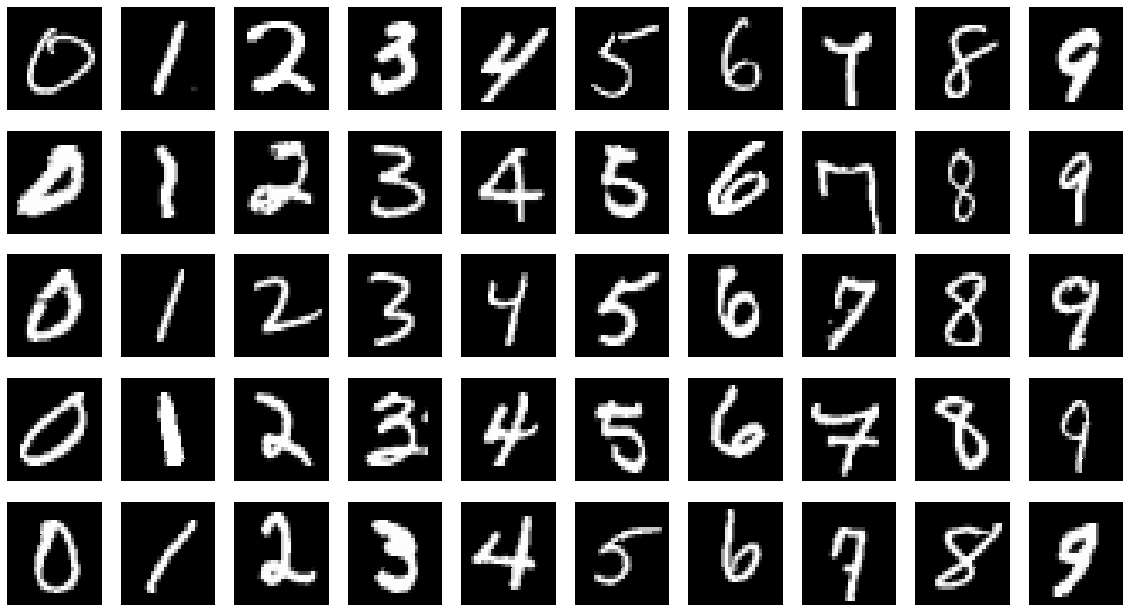

In [5]:
sampleforclass = 5
figure = plt.figure(figsize = (nclasses*2,(1+sampleforclass*2)))
idx_cls = 0
for cls in classes:
  idxs = np.flatnonzero(y == cls)
  idxs = np.random.choice(idxs,sampleforclass,replace = False)
  i = 0
  for idx in idxs:
    plt_idx = i*nclasses+idx_cls+1
    p = plt.subplot(sampleforclass,nclasses,plt_idx);
    p = sns.heatmap(np.reshape(x[idx],(28,28)),cmap = plt.cm.gray,xticklabels = False,yticklabels = False,cbar = False);
    p = plt.axis('off');
    i = i+1
  idx_cls += 1

In [6]:
print(len(x))
print(len(x[0]))

70000
784


In [7]:
print(x[0])
print(y[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

In [10]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state = 9,train_size = 7500,test_size = 2500)
xtrainscaled = xtrain/255
xtestscaled = xtest/255

In [11]:
clf = LogisticRegression(solver = 'saga',multi_class = 'multinomial').fit(xtrainscaled,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy;  0.9004


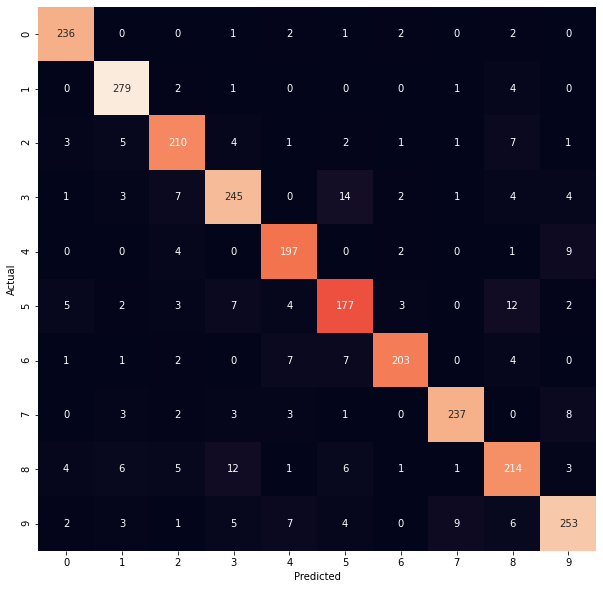

In [12]:
ypred = clf.predict(xtestscaled)
accuracy = accuracy_score(ytest,ypred)
print("Accuracy; ",accuracy)
cm = pd.crosstab(ytest,ypred,rownames = ['Actual'],colnames = ['Predicted'])
p = plt.figure(figsize = (10,10))
p = sns.heatmap(cm,annot = True,fmt = "d",cbar = False)